# Week 5 - Decision Trees and Random Forests
#### Part 3
### Notebook created by Jonathan Penava
By the end of this lesson you should know what a decision tree algorithm is, how it is constructed, and how to create a machine learning algorithm that uses decision trees.

## Overview
- Data Mining vs Machine Learning
- Decision Trees in Detail
- <span style="color:red;">Decision Tree Example</span>
- Random Forests

Let's run through some of the basic steps that we covered before

In [4]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,alone
0,0,3,0,22.0,1,0,7.2500,0,True,False
1,1,1,1,38.0,1,0,71.2833,1,False,False
2,1,3,1,26.0,0,0,7.9250,1,False,True
3,1,1,1,35.0,1,0,53.1000,1,False,False
4,0,3,0,35.0,0,0,8.0500,0,True,True


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

titanic = sns.load_dataset('titanic')

titanic.head()

titanic.drop('embark_town', axis=1, inplace=True)
titanic.drop('embarked', axis=1, inplace=True)
titanic.drop('deck', axis=1, inplace=True)
titanic.drop('class', axis=1, inplace=True)
titanic.drop('alive', axis=1, inplace=True)

titanic.replace('male', 0, inplace=True)
titanic.replace('female', 1, inplace=True)
titanic.replace('man', 0, inplace=True)
titanic.replace('woman', 1, inplace=True)
titanic.replace('child', 2, inplace=True)

titanic.dropna(axis=0, inplace=True)

#Remove the dependent data (our y) from our independent data (our x values)
X, y = titanic.drop('survived', axis=1), titanic['survived'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=87)

C:\Users\shree\AppData\Local\Temp\ipykernel_1596\1365969329.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic.replace('female', 1, inplace=True)
C:\Users\shree\AppData\Local\Temp\ipykernel_1596\1365969329.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic.replace('child', 2, inplace=True)


Now that we have our training data, let's use the decision tree model as our algorithm.

In [2]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

predictions = dtree.predict(X_test)

from sklearn.metrics import classification_report

#####
#Use the trained algorithm to make a prediction.
#####

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.76      0.80       130
           1       0.68      0.76      0.72        85

    accuracy                           0.76       215
   macro avg       0.75      0.76      0.76       215
weighted avg       0.77      0.76      0.76       215



Not quite as accurate as our logistic regression.  We saw this report in our previous class, let's go into a little more detail about what each of these columns are.

We have 4 possibilities:
<ul>
<li>TN - True Negative</li>
<li>TP - True Positive</li>
<li>FN - False Negative</li>
<li>FP - False Positive</li>
</ul>
<br>
Presicion - Measures the accuracy of our positive predictions. <br>
Precision = TP / (TP + FP)<br>
<br>
Recall - The percentage of positive cases that were correctly identified.<br>
Recall = TP / (TP + FN) <br>
<br>
F1 Socre - The percent of positive predictions that were correct.<br>
F1 Socre = 2*(Recall * Precision) / (Recall + Precision) <br>



We can also see the tree diagram that our model created. 

In [3]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,alone
0,0,3,0,22.0,1,0,7.2500,0,True,False
1,1,1,1,38.0,1,0,71.2833,1,False,False
2,1,3,1,26.0,0,0,7.9250,1,False,True
3,1,1,1,35.0,1,0,53.1000,1,False,False
4,0,3,0,35.0,0,0,8.0500,0,True,True


[Text(0.43111508534136544, 0.9666666666666667, 'adult_male <= 0.5\ngini = 0.484\nsamples = 499\nvalue = [294, 205]\nclass = Died'),
 Text(0.18624497991967873, 0.9, 'pclass <= 2.5\ngini = 0.409\nsamples = 209\nvalue = [60, 149]\nclass = Survived'),
 Text(0.07630522088353414, 0.8333333333333334, 'fare <= 28.856\ngini = 0.14\nsamples = 119\nvalue = [9, 110]\nclass = Survived'),
 Text(0.060240963855421686, 0.7666666666666667, 'fare <= 28.231\ngini = 0.237\nsamples = 51\nvalue = [7.0, 44.0]\nclass = Survived'),
 Text(0.05220883534136546, 0.7, 'age <= 55.5\ngini = 0.211\nsamples = 50\nvalue = [6, 44]\nclass = Survived'),
 Text(0.04417670682730924, 0.6333333333333333, 'age <= 23.5\ngini = 0.183\nsamples = 49\nvalue = [5, 44]\nclass = Survived'),
 Text(0.03614457831325301, 0.5666666666666667, 'gini = 0.0\nsamples = 13\nvalue = [0, 13]\nclass = Survived'),
 Text(0.05220883534136546, 0.5666666666666667, 'age <= 27.5\ngini = 0.239\nsamples = 36\nvalue = [5, 31]\nclass = Survived'),
 Text(0.032128

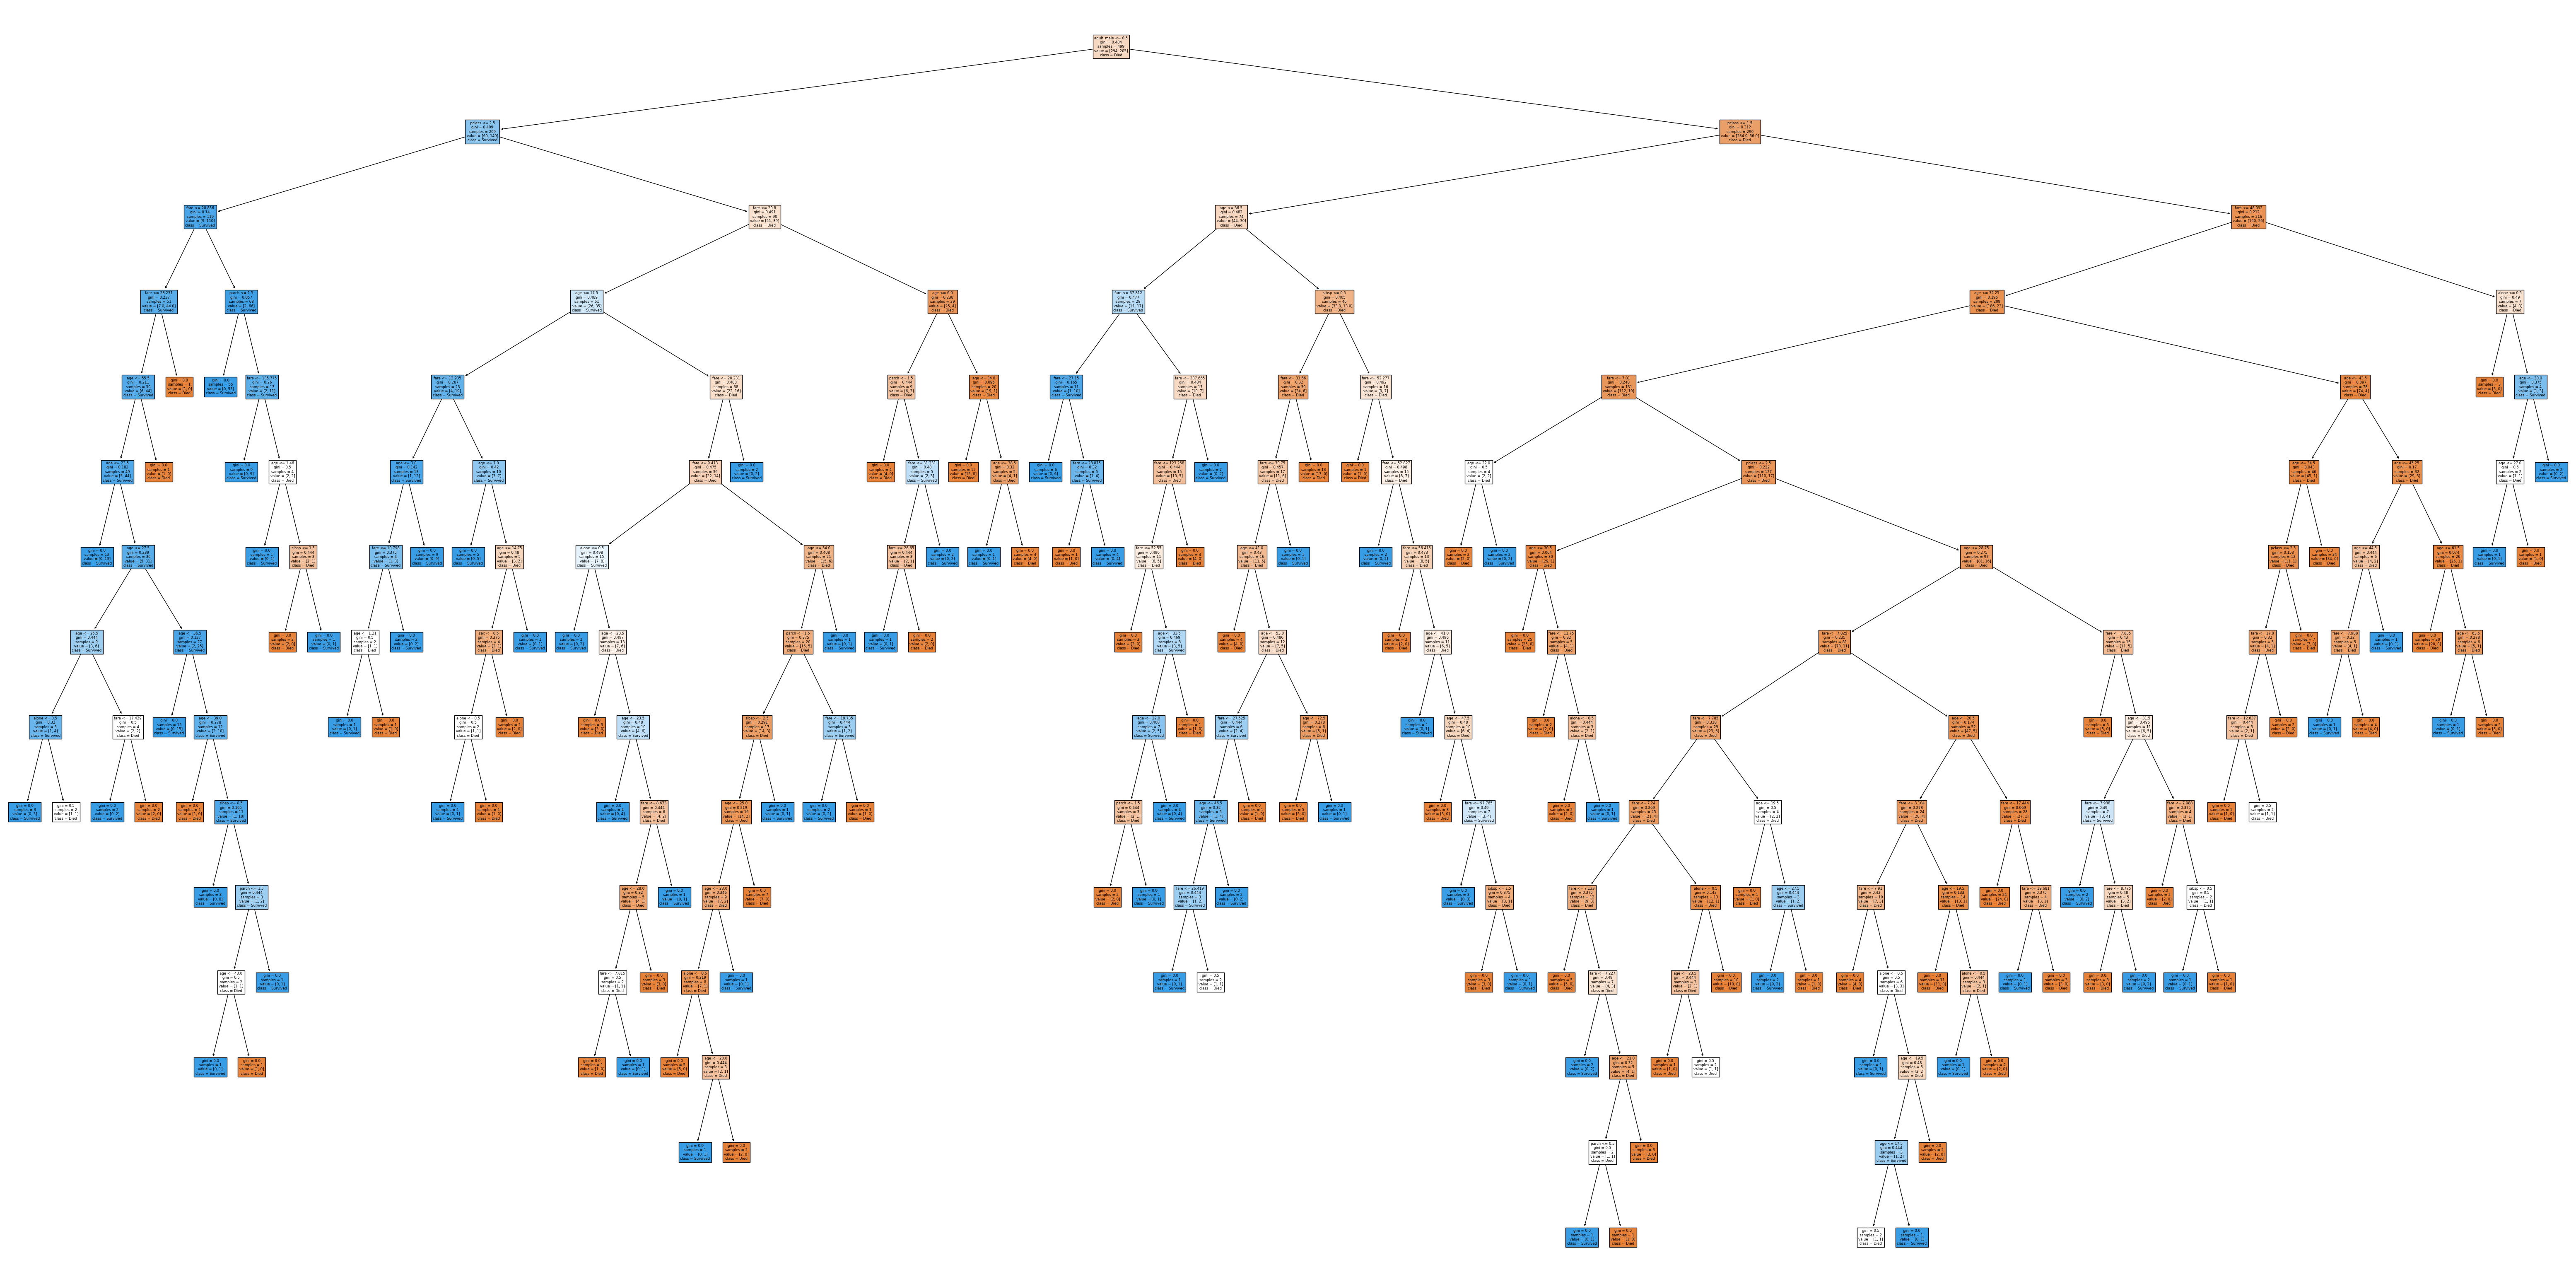

In [4]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80, 40))  # Set the figure sizea
fn = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'who', 'adult_male', 'alone']
cn = ['Died', 'Survived']
plot_tree(dtree, filled=True, feature_names=fn, class_names=cn)